In [99]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import date
import seaborn as sns
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)
label_encoder = LabelEncoder()

# Reading csv
data = pd.read_csv("MAIN_DATASET_spotify2023.csv")
pd.set_option('display.max_columns', None)
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


# Features Preprocessing

In [100]:
# Encoding key and bpm column
data['key'] = label_encoder.fit_transform(data['key'])
data['mode'] = label_encoder.fit_transform(data['mode'])

In [101]:
# transforming year, month and day into specific day of the year
released_day_of_year = []
if 'released_day_of_year' in data.columns:
    pass
else:
    for i in range(len(data.index)):
        day_of_year = date(data['released_year'][i],
                        data['released_month'][i],
                        data['released_day'][i]).timetuple().tm_yday
        released_day_of_year.append(day_of_year)

    data.insert(len(data.columns), "released_day_of_year", released_day_of_year, True)


In [102]:
# Converting the number of streams to be in millions
data["streams"] = data["streams"] / 1e6

In [103]:
# Selecting features we are using
data = data[["released_day_of_year","streams",'bpm','key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

<Axes: >

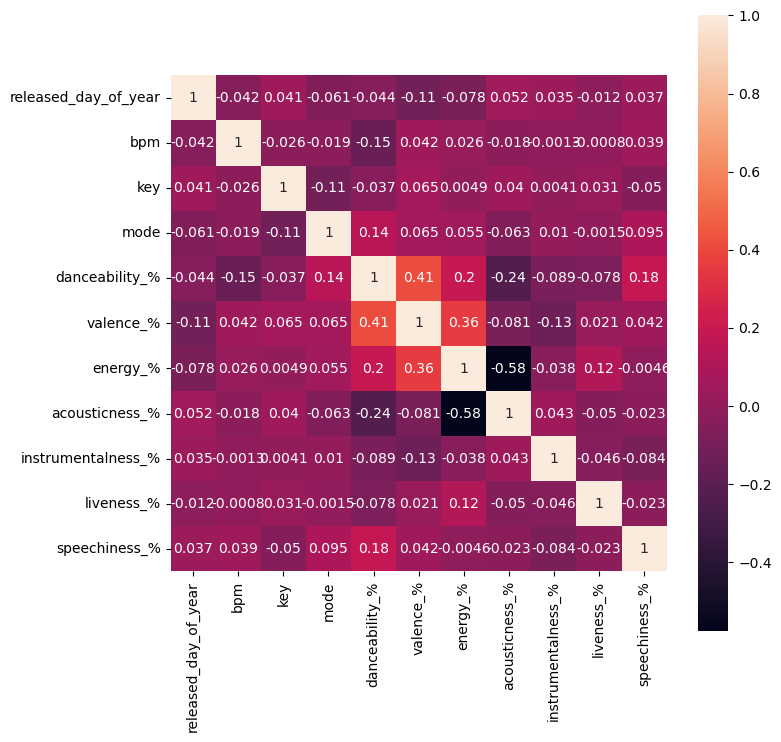

In [104]:
# Display correlation matrix
data_corr = data.drop(columns=['streams'])
corr = data_corr.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True)
     

### Outliers

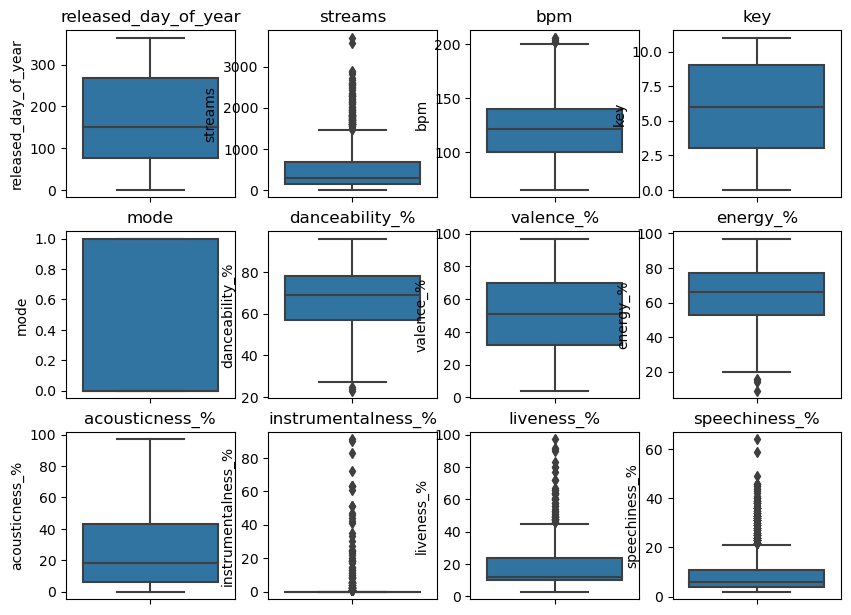

In [105]:
# Looking for outliers
plt.figure(figsize = (10, 10))
i = 1
for col in data.columns:
    plt.subplot(4,4,i)
    sns.boxplot(y = data[col])
    plt.title(col)
    i+=1
    
# We do not assume that outliers in streams are speechiness are outliers to remove. We are using every feature as it is.

### Data Stadarization\Normalization

In [106]:
standard_scaler = StandardScaler().set_output(transform="pandas")
minmax_scaler = MinMaxScaler().set_output(transform="pandas")

data_standardized = standard_scaler.fit_transform(data)
data_normalized = minmax_scaler.fit_transform(data)
